In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [11]:
X = pd.get_dummies(X)

In [12]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [15]:
X.fillna({'Age': X['Age'].median()}, inplace=True)

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [16]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [17]:
clf.score(X, y)

0.9797979797979798

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=42)

In [53]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': train_score, 'test_score': test_score, 'cross_score': mean_cross_score})
    scores_data = scores_data.append(temp_data)

In [54]:
scores_data.head()

,max_depth,train_score,test_score,cross_score
0,1,0.782313,0.788945,0.782583
0,2,0.802721,0.785595,0.772414
0,3,0.836735,0.812395,0.789363
0,4,0.863946,0.812395,0.789480
0,5,0.867347,0.783920,0.806429


In [55]:
scores_data = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_score'], var_name='score_type', value_name='score')

In [56]:
scores_data.head()

,max_depth,score_type,score
0,1,train_score,0.782313
1,2,train_score,0.802721
2,3,train_score,0.836735
3,4,train_score,0.863946
4,5,train_score,0.867347


In [47]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize': (12, 8)})

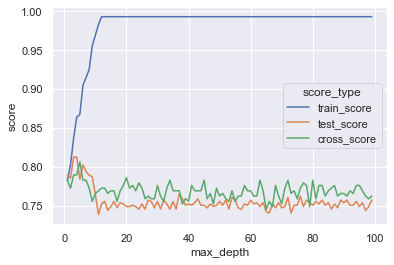

In [57]:
sns.lineplot(x='max_depth', y='score', hue='score_type', data=scores_data);

In [65]:
scores_data.sort_values(['score'], ascending=False).groupby('score_type').head()

,max_depth,score_type,score
89,90,train_score,0.993197
74,75,train_score,0.993197
72,73,train_score,0.993197
71,72,train_score,0.993197
70,71,train_score,0.993197
102,4,test_score,0.812395
101,3,test_score,0.812395
202,5,cross_score,0.806429
104,6,test_score,0.802345
105,7,test_score,0.793970


In [66]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [67]:
best_clf.score(X_test, y_test)

0.7839195979899497

In [69]:
animals_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [70]:
animals_data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [71]:
animals_data.shape

(1000, 6)

In [72]:
animals_test = pd.read_json('dataset.txt')

In [73]:
animals_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,32,38.4,1,1,0
1,22,26.4,1,1,0
2,30,36.0,1,1,0
3,24,28.8,1,1,0
4,24,28.8,1,1,0


In [74]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [75]:
X = animals_data.drop(['Вид'], axis=1)
y = animals_data['Вид']

In [76]:
best_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [84]:
pd.Series(best_clf.predict(animals_test)).value_counts()

котик      57
собачка    43
dtype: int64